In [2]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [14]:
df = pd.read_csv('stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df.shape

(5110, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
print(df['ever_married'].value_counts())
print(df['smoking_status'].value_counts())
print(df['gender'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [17]:
# simple mapping on binary features.
# df['gender'] = df['gender'].apply(
#     lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))
df['ever_married'] = df['ever_married'].apply(
    lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
print(df['Residence_type'].value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


# Label encoding

<AxesSubplot:xlabel='gender', ylabel='count'>

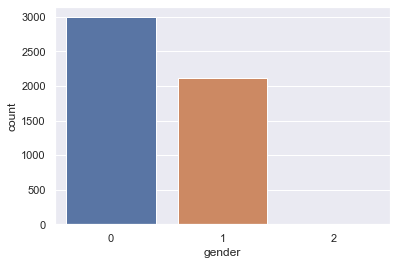

In [21]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
sns.set(style ="darkgrid")
sns.countplot(df['gender'])

# onehot

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
print(df['smoking_status'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# transforming the column after fitting
enc = enc.fit_transform(df[['work_type']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)
# concatenating dataframes
df = pd.concat([df, encoded_colm], axis=1)
# removing the encoded column.
df = df.drop(['work_type'], axis=1)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1,2,3,4
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,Rural,202.21,NaN,never smoked,1,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,0.0,0.0,1.0,0.0,0.0
3,60182,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0.0,0.0,1.0,0.0,0.0
4,1665,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,0.0,0.0,0.0,1.0,0.0
5,56669,1,81.0,0,0,1,Urban,186.21,29.0,formerly smoked,1,0.0,0.0,1.0,0.0,0.0
6,53882,1,74.0,1,1,1,Rural,70.09,27.4,never smoked,1,0.0,0.0,1.0,0.0,0.0
7,10434,0,69.0,0,0,0,Urban,94.39,22.8,never smoked,1,0.0,0.0,1.0,0.0,0.0
8,27419,0,59.0,0,0,1,Rural,76.15,NaN,Unknown,1,0.0,0.0,1.0,0.0,0.0
9,60491,0,78.0,0,0,1,Urban,58.57,24.2,Unknown,1,0.0,0.0,1.0,0.0,0.0


In [26]:
df = pd.get_dummies(df, prefix=['work_type'], columns=['work_type'])
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1,0,0,1,0,0
6,53882,Male,74.0,1,1,Yes,Rural,70.09,27.4,never smoked,1,0,0,1,0,0
7,10434,Female,69.0,0,0,No,Urban,94.39,22.8,never smoked,1,0,0,1,0,0
8,27419,Female,59.0,0,0,Yes,Rural,76.15,NaN,Unknown,1,0,0,1,0,0
9,60491,Female,78.0,0,0,Yes,Urban,58.57,24.2,Unknown,1,0,0,1,0,0


# Ordinal

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[grade])
df['Category'] = encoder.fit_transform(df[['Grade']])
print(encoder.categories_)
print(df.iloc[sampled_index])

In [3]:
mkta = pd.read_csv('marketing.csv')

In [19]:
mkta.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,age_group_encod
0,a100000029,01-01-2018,House Ads,personalization,True,English,English,0-18 years,01-01-2018,NaN,House Ads,True,0.0
1,a100000030,01-01-2018,House Ads,personalization,True,English,English,19-24 years,01-01-2018,NaN,House Ads,True,1.0
2,a100000031,01-01-2018,House Ads,personalization,True,English,English,24-30 years,01-01-2018,NaN,House Ads,True,2.0
3,a100000032,01-01-2018,House Ads,personalization,True,English,English,30-36 years,01-01-2018,NaN,House Ads,True,3.0
4,a100000033,01-01-2018,House Ads,personalization,True,English,English,36-45 years,01-01-2018,NaN,House Ads,True,4.0


In [16]:
# creating a dictionary
temp_dict = {'0-18 years': 0, '19-24 years': 1, '24-30 years': 2, '30-36 years': 3,'36-45 years': 4 }
# mapping values in column from dictionary
mkta['age_group_encod'] = mkta.age_group.map(temp_dict)
# df = df.drop(['smoking_status'], axis=1)

In [6]:
mkta.groupby(['marketing_channel']).size()

marketing_channel
Email         565
Facebook     1860
House Ads    4733
Instagram    1871
Push          993
dtype: int64

In [21]:
!pip install category_encoders

In [24]:
from category_encoders.count import CountEncoder
import category_encoders as ce
# Initialize the CountEncoder
count_encoder = ce.CountEncoder()

# Fit the encoder on the training data
count_encoder.fit(mkta[['marketing_channel', 'variant']])

# Transform both the training and test datasets
train_encoded = count_encoder.transform(mkta[['marketing_channel', 'variant']])


# # Display the encoded datasets
# print("After Count Encoding):\n", train_encoded)

# targeted encoding